In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('Iris.csv')

In [ ]:
df.sample(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
32,33,5.2,4.1,1.5,0.1,Iris-setosa
109,110,7.2,3.6,6.1,2.5,Iris-virginica
48,49,5.3,3.7,1.5,0.2,Iris-setosa


In [ ]:
df.drop('Id',axis=1,inplace=True)

In [ ]:
features=df.drop('Species', axis=1)
target=df['Species']

In [ ]:
le=LabelEncoder()
target=le.fit_transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(features,target,test_size=0.2,random_state=4)

In [ ]:
scaler=StandardScaler()
xtrain_ss=scaler.fit_transform(xtrain)
xtest_ss = scaler.transform(xtest)

In [ ]:
model=Sequential()
model.add(Dense(16,activation='relu',input_dim=4)) # 4*16+16
model.add(Dense(8,activation='relu'))   # 16*8+8
model.add(Dense(3,activation='softmax'))   # 8*3+3

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243 (972.00 B)

 Trainable params: 243 (972.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam')
# loss = sparse_categorical_crossentropy for multiclass classification
# for regression loss = mse

In [ ]:
xtrain_ss.shape

(120, 4)

In [ ]:
history=model.fit(xtrain_ss,ytrain,epochs=10,validation_split=0.2,batch_size=24)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.4014 - loss: 1.0322 - val_accuracy: 0.4583 - val_loss: 0.9751
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4889 - loss: 0.9945 - val_accuracy: 0.5000 - val_loss: 0.9578
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5139 - loss: 0.9925 - val_accuracy: 0.5000 - val_loss: 0.9417
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.5958 - loss: 0.9666 - val_accuracy: 0.6250 - val_loss: 0.9263
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.6708 - loss: 0.9479 - val_accuracy: 0.6667 - val_loss: 0.9118
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.7333 - loss: 0.9524 - val_accuracy: 0.7083 - val_loss: 0.8979
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7611 - loss: 0.9314 - val_accuracy: 0.7500 - val_loss: 0.8838
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8236 - loss: 0.9022 - val_accuracy: 0.7500 - val_loss: 0.86

In [ ]:
ypred=model.predict(xtest_ss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


In [ ]:
ypred

array([[0.23071417, 0.23360573, 0.53568006],
       [0.42038018, 0.23101118, 0.34860858],
       [0.225497  , 0.16361643, 0.6108866 ],
       [0.18169177, 0.11809947, 0.70020866],
       [0.22430876, 0.16004127, 0.61564994],
       [0.2970692 , 0.32619718, 0.37673357],
       [0.28427565, 0.3231874 , 0.39253685],
       [0.4394826 , 0.20878631, 0.3517311 ],
       [0.4244033 , 0.22441031, 0.35118636],
       [0.2904396 , 0.2941493 , 0.41541103],
       [0.3848597 , 0.36666948, 0.2484708 ],
       [0.4325705 , 0.24103615, 0.3263933 ],
       [0.38666943, 0.3663064 , 0.24702412],
       [0.30056104, 0.3200543 , 0.37938464],
       [0.26716143, 0.3589289 , 0.37390956],
       [0.4086744 , 0.33220005, 0.25912553],
       [0.21431035, 0.48728344, 0.29840618],
       [0.41542792, 0.31498513, 0.26958686],
       [0.4227298 , 0.23545732, 0.34181294],
       [0.27773678, 0.2892822 , 0.43298092],
       [0.42780787, 0.31734404, 0.2548482 ],
       [0.20475827, 0.17302862, 0.6222131 ],
       [0.

In [ ]:
y_pred=np.argmax(ypred,axis=1)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print('confusion_matrix \n', confusion_matrix(ytest,y_pred))
print('classification_report \n',classification_report(ytest,y_pred))

confusion_matrix 
 [[15  1  0]
 [ 0  2  3]
 [ 0  0  9]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.67      0.40      0.50         5
           2       0.75      1.00      0.86         9

    accuracy                           0.87        30
   macro avg       0.81      0.78      0.77        30
weighted avg       0.87      0.87      0.86        30



Text(0, 0.5, 'loss')

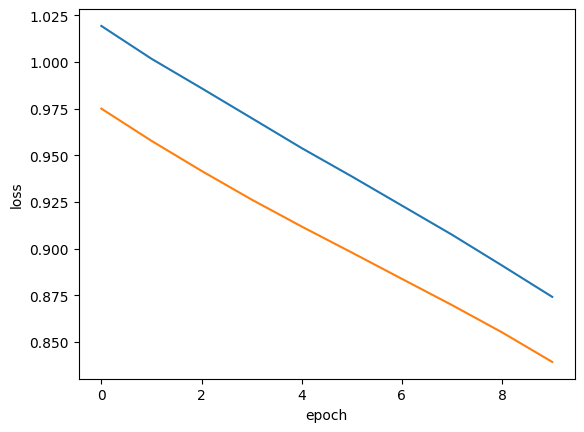

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
model=Sequential()
model.add(Dense(64,activation='relu',input_dim=4)) #
model.add(Dense(32,activation='relu'))   #
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(3,activation='softmax'))   #

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history=model.fit(xtrain_ss,ytrain,epochs=100,validation_split=0.2,batch_size=24)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - accuracy: 0.3333 - loss: 1.0626 - val_accuracy: 0.3750 - val_loss: 1.0305
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.4528 - loss: 0.9764 - val_accuracy: 0.3750 - val_loss: 0.9776
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.4653 - loss: 0.9362 - val_accuracy: 0.5000 - val_loss: 0.9406
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6361 - loss: 0.8863 - val_accuracy: 0.6667 - val_loss: 0.9071
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.7181 - loss: 0.8675 - val_accuracy: 0.7500 - val_loss: 0.8759
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8042 - loss: 0.8309 - val_accuracy: 0.8333 - val_loss: 0.8487
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8194 - loss: 0.7730 - val_accuracy: 0.7500 - val_loss: 0.8279
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7750 - loss: 0.7635 - val_accuracy: 0.8333 - val_loss

Text(0, 0.5, 'loss')

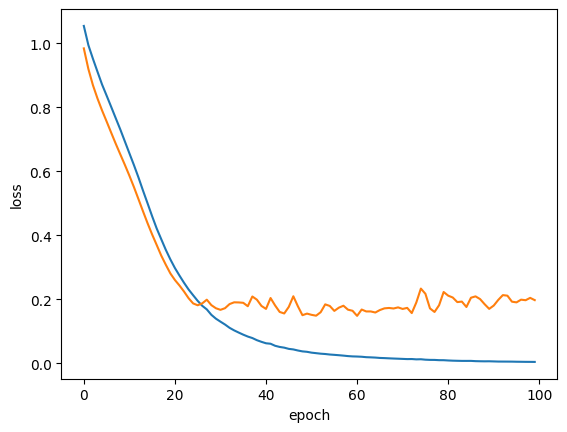

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

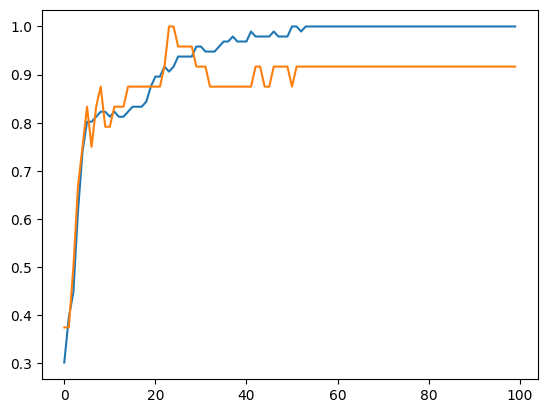

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
model=Sequential()
model.add(Dense(64,activation='relu',input_dim=4)) #
model.add(Dense(8,activation='relu'))
model.add(Dense(3,activation='softmax'))   #

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history=model.fit(xtrain_ss,ytrain,epochs=8,validation_split=0.2,batch_size=1)

Epoch 1/8
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5791 - loss: 0.9625 - val_accuracy: 0.7083 - val_loss: 0.6892
Epoch 2/8
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6959 - loss: 0.6475 - val_accuracy: 0.7500 - val_loss: 0.5207
Epoch 3/8
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8167 - loss: 0.5284 - val_accuracy: 0.8333 - val_loss: 0.4221
Epoch 4/8
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8697 - loss: 0.4101 - val_accuracy: 0.8750 - val_loss: 0.3195
Epoch 5/8
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8628 - loss: 0.3276 - val_accuracy: 0.9583 - val_loss: 0.2289
Epoch 6/8
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9725 - loss: 0.1815 - val_accuracy: 1.0000 - val_loss: 0.1774
Epoch 7/8
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9663 - loss: 0.1603 - val_accuracy: 1.0000 - val_loss: 0.1536
Epoch 8/8
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9324 - loss: 0.1548 - val_accuracy: 1.0000 - val_loss: 0.1270


Text(0, 0.5, 'loss')

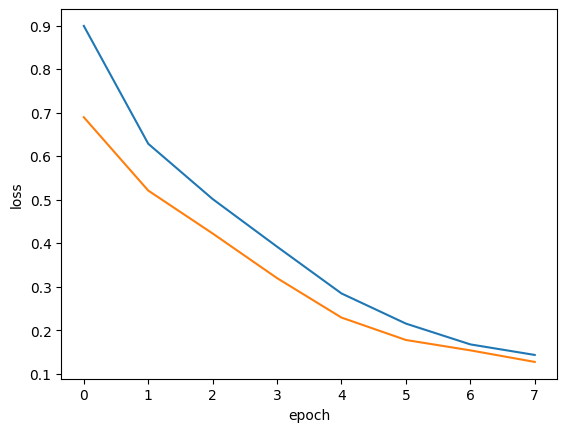

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

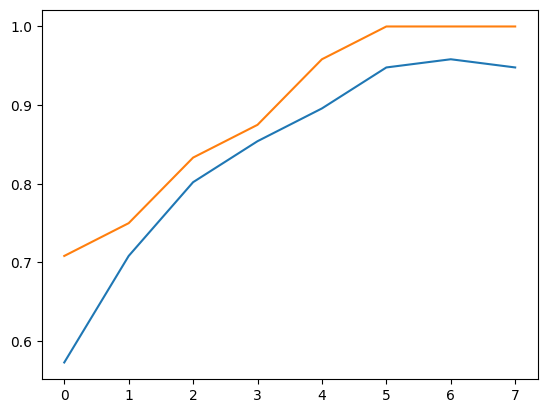

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])